## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [16]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [17]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/META_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [18]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [28]:
merged_df = pd.merge(news_df[(news_df['stock'] == 'FB') | (news_df['stock'] == 'META')], 
                     stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [29]:
print(merged_df.shape)
merged_df.head(5)

(360, 15)


,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Calendar Apps Can Do Wonders And Not Only For ...,https://www.benzinga.com/news/20/02/15364635/c...,IAM Newswire,2020-02-19 00:00:00+00:00,FB,0.000000,2020-02-19 00:00:00+00:00,217.990005,218.320007,216.110001,217.490005,217.043991,12135100,0.0,0.0
1,Bloomberg Pays People To Promote His Campaign ...,https://www.benzinga.com/news/20/02/15371694/b...,Neer Varshney,2020-02-19 00:00:00+00:00,FB,0.016667,2020-02-19 00:00:00+00:00,217.990005,218.320007,216.110001,217.490005,217.043991,12135100,0.0,0.0
2,Peter Thiel-Backed Startup Begins Mining Bitco...,https://www.benzinga.com/markets/cryptocurrenc...,Neer Varshney,2020-02-20 00:00:00+00:00,FB,0.000000,2020-02-20 00:00:00+00:00,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0
3,No More Immunity? Justice Department Wants Tec...,https://www.benzinga.com/government/20/02/1537...,Neer Varshney,2020-02-20 00:00:00+00:00,FB,0.050000,2020-02-20 00:00:00+00:00,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0
4,Shopify Shares Unaffected As Hearing Co. to Jo...,https://www.benzinga.com/news/20/02/15384547/s...,Benzinga Newsdesk,2020-02-21 00:00:00+00:00,FB,-0.050000,2020-02-21 00:00:00+00:00,213.479996,214.240005,208.830002,210.179993,209.748962,14092300,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [30]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(360, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [31]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,Calendar Apps Can Do Wonders And Not Only For ...,https://www.benzinga.com/news/20/02/15364635/c...,IAM Newswire,2020-02-19 00:00:00+00:00,FB,0.000000,2020-02-19 00:00:00+00:00,217.990005,218.320007,216.110001,217.490005,217.043991,12135100,0.0,0.0,NaN
1,Bloomberg Pays People To Promote His Campaign ...,https://www.benzinga.com/news/20/02/15371694/b...,Neer Varshney,2020-02-19 00:00:00+00:00,FB,0.016667,2020-02-19 00:00:00+00:00,217.990005,218.320007,216.110001,217.490005,217.043991,12135100,0.0,0.0,0.000000
2,Peter Thiel-Backed Startup Begins Mining Bitco...,https://www.benzinga.com/markets/cryptocurrenc...,Neer Varshney,2020-02-20 00:00:00+00:00,FB,0.000000,2020-02-20 00:00:00+00:00,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0,-0.013380
3,No More Immunity? Justice Department Wants Tec...,https://www.benzinga.com/government/20/02/1537...,Neer Varshney,2020-02-20 00:00:00+00:00,FB,0.050000,2020-02-20 00:00:00+00:00,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0,0.000000
4,Shopify Shares Unaffected As Hearing Co. to Jo...,https://www.benzinga.com/news/20/02/15384547/s...,Benzinga Newsdesk,2020-02-21 00:00:00+00:00,FB,-0.050000,2020-02-21 00:00:00+00:00,213.479996,214.240005,208.830002,210.179993,209.748962,14092300,0.0,0.0,-0.020505


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [32]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: -0.009492055494928084, p-value: 0.8577605660650299


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [33]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.09755540458152831, p-value: 0.06483834895351304


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [34]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.08292640168691091, p-value: 0.06498196767611039


The results show the following correlation values between news sentiment and daily stock return for META:

- **Pearson correlation:** -0.00949 (p-value: 0.8577)
- **Spearman correlation:** 0.09755 (p-value: 0.06483)
- **Kendall correlation:** 0.08292 (p-value: 0.06498)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

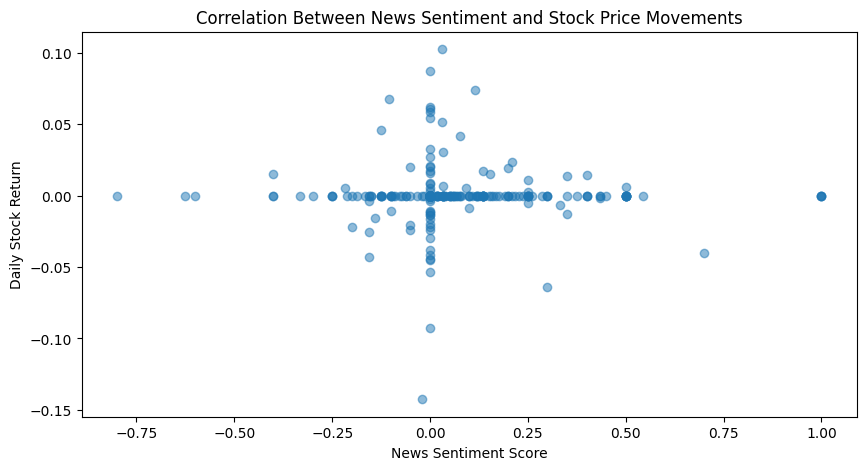

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

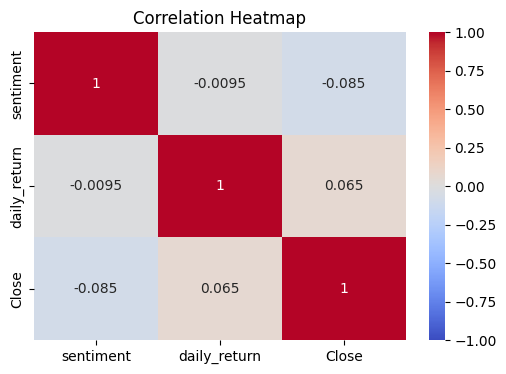

In [36]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()